 # Twitter Sentiment Analysis dataset processor

In [1]:
from matplotlib import pyplot as plt

import numpy as np

import math
import csv

## Utilities

In [2]:
def get_sentences_per_label(dataset_filename):
    positive_statements = []
    negative_statements = []

    with open(dataset_filename, 'r', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)

        for sentence_counter, sentence in enumerate(csv_reader, 1):
            sentiment = sentence[1]
            if sentiment == '0':
                negative_statements.append(sentence_counter)
            elif sentiment == '1':
                positive_statements.append(sentence_counter)
            else:
                print('Unexpected sentiment value {}'.format(sentiment))
    
    return positive_statements, negative_statements

## Dataset splitting

In [3]:
# CONSTANTS
TRAIN_DATASET_FACTOR = 0.5          # TODO
TEST_DATASET_FACTOR = 0.4           # TODO

MOBILE_DATASETS_NUMBER = 3          # TODO
MOBILE_DATASET_FACTOR = 0.3         # TODO

# UTILITIES
def clean_statement(statement):
    # TODO:
    #   - convert to lowercase
    #   - strip whitespaces,
    #   - handle hashtags (#),
    #   - handle emoticons (consider e.g. "< 33", ":)" and ":O"),
    #   - remove mentions (@),
    #   - remove insignificant punctuation (watch out for things like "I'm" and "How's", however "'s" in "Tom's house" should be removed),
    #   - remove special characters (e.g. &amp;, < b >).
    # In general, try to search for sth like regexp for english words.
    return statement

In [4]:
def split_dataset():
    def create_dataset(available_statements, factor, csv_reader, output_filename, should_clean_statements, remove_chosen_statements): 
        chosen_positive = np.random.choice(available_statements[0], math.ceil(factor * len(available_statements[0])), replace=False)
        chosen_negative = np.random.choice(available_statements[1], math.ceil(factor * len(available_statements[1])), replace=False)
        chosen_shuffled = np.concatenate((chosen_positive, chosen_negative))
        np.random.shuffle(chosen_shuffled)
        
        with open(output_filename, 'w', encoding='utf-8', newline='') as output_file:
            csv_writer = csv.writer(output_file, delimiter=',')
            for statement_index in chosen_shuffled:
                statement = csv_reader[statement_index]
                csv_writer.writerow([statement[1], clean_statement(statement[3]) if should_clean_statements else statement[3]])
        print('File {} saved.'.format(output_filename))
        
        if remove_chosen_statements:
            list_difference = lambda first, second: list(set(first) - set(second))
            return list_difference(available_statements[0], chosen_positive.tolist()), list_difference(available_statements[1], chosen_negative.tolist())
        return available_statements[0], available_statements[1]
    
    
    positive_statements, negative_statements = get_sentences_per_label('dataset.csv')    
    with open('dataset.csv', 'r', encoding='utf-8') as dataset_file:
        csv_reader = list(csv.reader(dataset_file, delimiter=','))
        positive_statements, negative_statements = create_dataset((positive_statements, negative_statements), TRAIN_DATASET_FACTOR, csv_reader, 'train.csv', True, True)
        positive_statements, negative_statements = create_dataset((positive_statements, negative_statements), TEST_DATASET_FACTOR, csv_reader, 'test.csv', True, True)
        for mobile_dataset_index in range(1, MOBILE_DATASETS_NUMBER + 1):
            positive_statements, negative_statements = create_dataset((positive_statements, negative_statements), MOBILE_DATASET_FACTOR, csv_reader, 'mobile_{}.csv'.format(mobile_dataset_index), True, False)


split_dataset()

File train.csv saved.
File test.csv saved.
File mobile_1.csv saved.
File mobile_2.csv saved.
File mobile_3.csv saved.


## Dataset analysis

In [5]:
def analyse_dataset(dataset_filename, has_header=True):
    positive_statements, negative_statements = get_sentences_per_label(dataset_filename)
    total_statements = len(positive_statements) + len(negative_statements)
    
    # CLASSES DISTRIBUTION
    barchart = plt.bar([0, 1], [len(positive_statements) / total_statements, len(negative_statements) / total_statements], tick_label=['positive', 'negative'])
    
    for bar in barchart:
        height = bar.get_height()
        plt.text(bar.get_x() + 0.3, height + 0.005, "{:.5f}".format(height))
    plt.title('Classes distribution')
    plt.xlabel('Class')
    plt.ylabel('Participation in the dataset')
    plt.show()
    
    print('Positive statements: {} ({:.5f}%).'.format(len(positive_statements), len(positive_statements) / total_statements))
    print('Negative statements: {} ({:.5f}%).'.format(len(negative_statements), len(negative_statements) / total_statements))
    print('Total statements: {}.'.format(total_statements))
    
    # WORDS STATISTICS
    with open(dataset_filename, 'r', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        if has_header:
            next(csv_reader)
        
        words_count = []
        for sentence in csv_reader:
            words_count.append(len(sentence[3].split()))
    
    plt.hist(words_count, max(words_count))
    
    plt.title('Words count histogram')
    plt.xlabel('Words count')
    plt.ylabel('Frequency')
    plt.show()
    
    print('Maximal number of words: {}.'.format(max(words_count)))
    print('Average number of words: {:.2f}.'.format(sum(words_count) / len(words_count)))
    
    sorted_words_count = sorted(words_count)
    quartile_index = len(words_count) // 4
    print('First quartile: {}, second quartile (median): {}, third quartile: {}.'.format(sorted_words_count[quartile_index], sorted_words_count[2 * quartile_index], sorted_words_count[3 * quartile_index]))

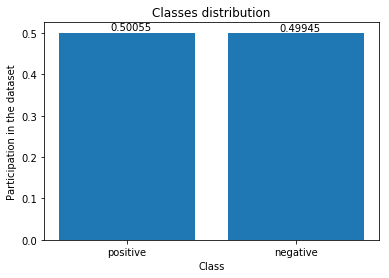

Positive statements: 790185 (0.50055%).
Negative statements: 788442 (0.49945%).
Total statements: 1578627.


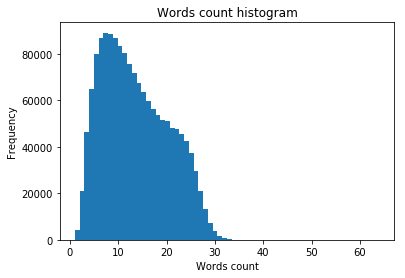

Maximal number of words: 64.
Average number of words: 13.27.
First quartile: 8, second quartile (median): 12, third quartile: 19.


In [6]:
analyse_dataset('dataset.csv')